In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean

In [2]:
#Load data
train_df = pd.read_csv('../data/train.csv', encoding = 'latin-1')
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In this notebook, we are going to look at possible statistics that could let us help predict the difficulty of reading texts.

Since some of these statistics might change with respect to the text being processed or not, we'll explore the statistics in both cases.

Thus, let us first execute the script which processes the texts.

In [3]:
new_file = 'cleaned_text_for_exploration.csv'
new_column = 'cleaned_text'

#%run ../scripts/text_processing.py -f ../data/train.csv -c excerpt -nc cleaned_text -nf cleaned_text_for_exploration.csv

new_df = pd.read_csv('../data/outputs/' + new_file)
columns = ['excerpt', 'cleaned_text', 'target', 'standard_error']
text_df = pd.DataFrame(new_df, columns=columns)
text_df.head()

,excerpt,cleaned_text,target,standard_error
0,When the young people returned to the ballroom...,young peopl return ballroom present decid chan...,-0.340259,0.464009
1,"All through dinner time, Mrs. Fayre was somewh...",dinner time mrs fayr somewhat silent eye rest ...,-0.315372,0.480805
2,"As Roger had predicted, the snow departed as q...",roger predict snow depart quick came two day s...,-0.580118,0.476676
3,And outside before the palace a great garden w...,outsid palac great garden wall round fill full...,-1.054013,0.450007
4,Once upon a time there were Three Bears who li...,upon time three bear live togeth hous wood one...,0.247197,0.510845


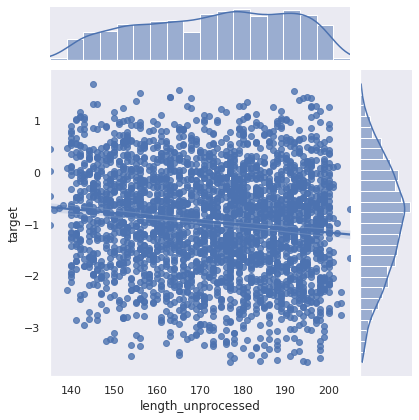

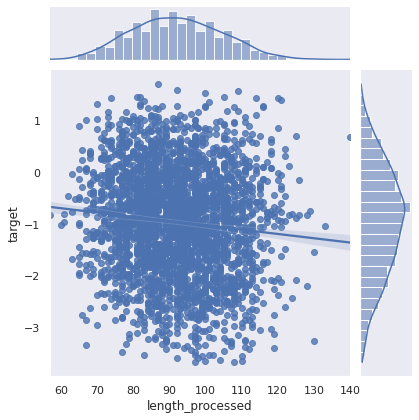

In [4]:
## EXPLORATORY ANALYSIS

# Let's see the distribution of the lengths of the texts, and see if they have any correlation with the target
text_df['length_unprocessed'] = text_df['excerpt'].str.lower().str.split().apply(len)
text_df['length_processed'] = text_df[new_column].str.split().apply(len)


#sns.jointplot(x=train_df["length"], y=train_df["target"], kind='scatter', s=200, color='grey', edgecolor="skyblue", linewidth=2)
sns.set(style="dark", color_codes=True)
#sns.jointplot(x=train_df["length"], y=train_df["target"], kind='kde', color="skyblue")
sns.jointplot(x=text_df["length_unprocessed"], y=text_df["target"], kind='reg')
sns.jointplot(x=text_df["length_processed"], y=text_df["target"], kind='reg')

We can conclude that the length of the texts does not have any impact whatsoever with respect to its difficulty.

Now let's create two different but similar measures. The mean word length per text, and the words/text length ratio, and see their correlations with the target.

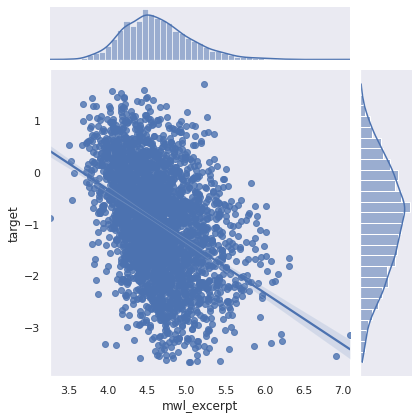

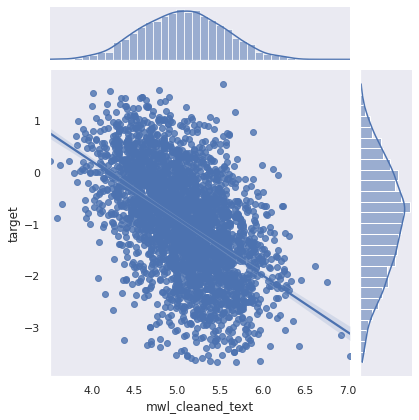

In [5]:
def occurrences_of (s:str, df:pd.DataFrame) -> int:
    return sum(df.apply(lambda x: sum([y == s for y in x])))  

def mean_word_length (df:pd.DataFrame, col='cleaned_text') -> None:
    '''Creates a column 'mwl' in df for the mean of the word length in col'''
    newcol = 'mwl_'+col
    df[newcol] = df[col].apply(lambda x: list(map(len,x.split()))) #Length of each word
    df[newcol] = df[newcol].apply(lambda x: list(map(float,x))) #Convert the lengths to floats
    df[newcol] = df[newcol].apply(lambda x: mean(x)) #Calculate the mean
    return

# Add column for the unprocessed text
mean_word_length(text_df, 'excerpt')

# Add column for the proccessed text
mean_word_length(text_df)

sns.jointplot(x=text_df["mwl_excerpt"], y=text_df["target"], kind='reg')
sns.jointplot(x=text_df["mwl_cleaned_text"], y=text_df["target"], kind='reg')


Due to the high variance of this statistics, we cannot use them to predict text dificulty.

One last statistic that we will analyze is the amount of words deleted during the cleaning process of the text.

Let us see if this has says anything about the complexity of the texts.

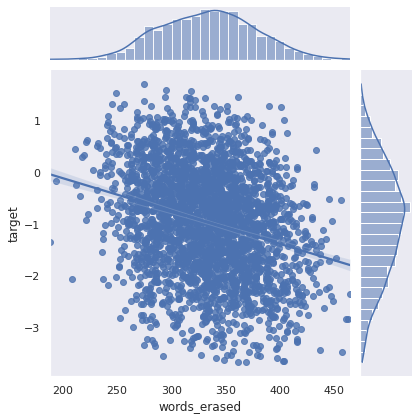

In [6]:
text_df['words_erased'] = text_df['excerpt'].apply(lambda x: list(map(len,x.split()))).apply(lambda x: list(map(float,x))).apply(lambda x: sum(x))- \
    text_df['cleaned_text'].apply(lambda x: list(map(len,x.split()))).apply(lambda x: list(map(float,x))).apply(lambda x: sum(x))

sns.jointplot(x=text_df["words_erased"], y=text_df["target"], kind='reg')

If anything, this statistic contains less information about the difficulty of the texts than the previous ones.